# ML Case Study 3


## Employee Attrition Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.pipeline import Pipeline


In [6]:
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/HR_comma_sep.csv"
data = pd.read_csv(url)

print("Dataset Shape:", data.shape)
data.head(10)

Dataset Shape: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
print(data.info())
print(data.describe())

# Renaming columns for easier access
data.columns = [c.strip().replace(' ', '_') for c in data.columns]
data.rename(columns={'sales': 'Department', 'left': 'Attrition'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

## Encoding

In [8]:
label = LabelEncoder()
data['Department'] = label.fit_transform(data['Department'])
data['salary'] = label.fit_transform(data['salary'])


## Feature Selection

In [9]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Build Pipeline (Scaling + Model)

In [10]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])


## Hyperparamater Tuning

In [12]:
grid_lr = GridSearchCV(
    Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=1000))]),
    {'model__C': [0.1, 1, 10]},
    cv=5
)

grid_rf = GridSearchCV(
    Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=42))]),
    {'model__n_estimators': [50, 100, 200]},
    cv=5
)

grid_lr.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Random Forest Parameters:", grid_rf.best_params_)

Best Logistic Regression Parameters: {'model__C': 0.1}
Best Random Forest Parameters: {'model__n_estimators': 100}


## Evaluation


🔹 Logistic Regression Performance:
Accuracy: 0.7716666666666666
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2286
           1       0.54      0.26      0.35       714

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000



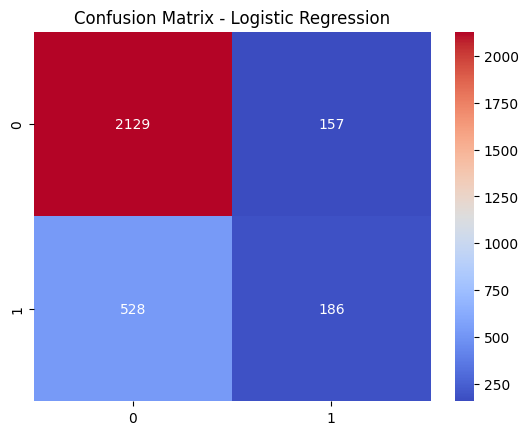


🔹 Random Forest Performance:
Accuracy: 0.991
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



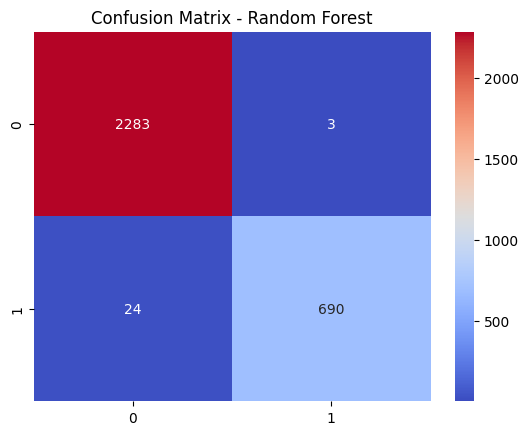

In [13]:
models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Random Forest": grid_rf.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## ROC Curve



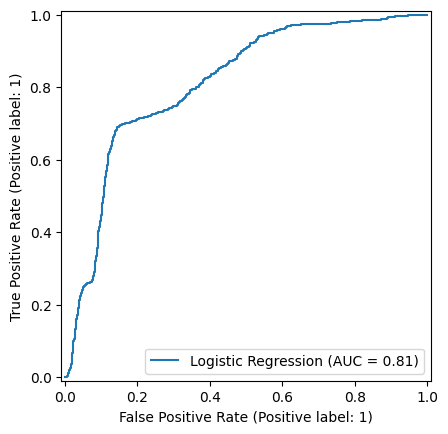

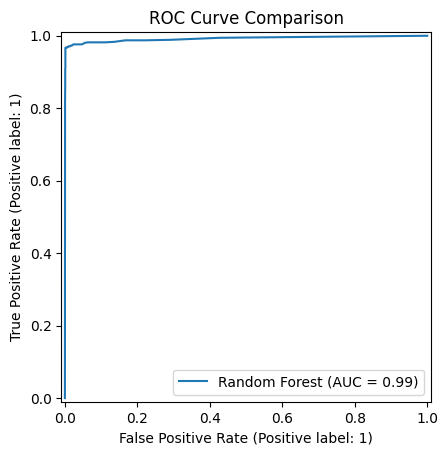

In [14]:
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)

plt.title("ROC Curve Comparison")
plt.show()